In [1]:
# Regression Neural Network

In [2]:
'''
      У даній лабораторній роботі на основі даних про автомобілі спробуємо використати регресійні нейронні мережі для
прогнозування ціни автомобіля.
        Для цього дані для побудови моделей буде прошкальовано та розділено на навчальну та тестову вибірку, аби перевірити
прогнозні якості моделей. Для перевірки якості оцінки та прогнозу моделями буде використовуватися така метрика, як
cередньоквадратична помилка MSE.
    У роботі буде розглянуто нейронні мережі з різною архітектурою.
'''

'\n      У даній лабораторній роботі на основі даних про автомобілі спробуємо використати регресійні нейронні мережі для\nпрогнозування ціни автомобіля.\n        Для цього дані для побудови моделей буде прошкальовано та розділено на навчальну та тестову вибірку, аби перевірити\nпрогнозні якості моделей. Для перевірки якості оцінки та прогнозу моделями буде використовуватися така метрика, як\ncередньоквадратична помилка MSE.\n    У роботі буде розглянуто нейронні мережі з різною архітектурою.\n'

In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Importing the datasets
df=pd.read_csv('Cars_prep (Tomilovych, EC-61).csv', sep=';')
df

,symboling,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,...,engine-type.ohcv,num-of-cylinders.five,num-of-cylinders.four,num-of-cylinders.more than six,num-of-cylinders.six,fuel-system.1bbl,fuel-system.2bbl,fuel-system.idi,fuel-system.mpfi,price
0,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,1,0,0,0,0,0,1,13495.0
1,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,1,0,0,0,0,0,1,16500.0
2,1,1,0,1,0,94.5,171.2,65.5,52.4,2823,...,1,0,0,0,1,0,0,0,1,16500.0
3,2,1,0,0,0,99.8,176.6,66.2,54.3,2337,...,0,0,1,0,0,0,0,0,1,13950.0
4,2,1,0,0,0,99.4,176.6,66.4,54.3,2824,...,0,1,0,0,0,0,0,0,1,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,0,0,109.1,188.8,68.9,55.5,2952,...,0,0,1,0,0,0,0,0,1,16845.0
201,-1,1,1,0,0,109.1,188.8,68.8,55.5,3049,...,0,0,1,0,0,0,0,0,1,19045.0
202,-1,1,0,0,0,109.1,188.8,68.9,55.5,3012,...,1,0,0,0,1,0,0,0,1,21485.0
203,-1,0,1,0,0,109.1,188.8,68.9,55.5,3217,...,0,0,0,0,1,0,0,1,0,22470.0


In [5]:
'''
    Початкові дані піддаються шкалюванню шлязом стандартизації. Варто зауважити, що шкалюванню піддаються тільки кількісні
змінні, оскільки якісні змінні раніше було кодовано й тепер вони розташовані в необхі дному інтервалі [0; 1]. Також було
стандартизовано змінну symboling, яка вказує на належність до деякого класу з множини впорядкованих класів і через це не була
кодована з якісними змінними.
    Варто зауважити, що оголошений метод ss зберігає параметри тільки останньої змінної, яку він шкалює. Але оскільки
створення окремих методів для кожної змінної є трудомістким, оскільки легше буде знову експортувати їх з файлу, то було
додано окремий метод шкалювання ScalerY тільки для результуючої змінної price - ціни автомобіля. Також останньою незалежною
змінною, що піддалася шкалюванню, було навмисне вибрано engine-size - така, що має найбільший коефіцієнт кореляції з залежною
змінною і буде в подальшому використовуватися для візуалізації результатів.
'''

'\n    Початкові дані піддаються шкалюванню шлязом стандартизації. Варто зауважити, що шкалюванню піддаються тільки кількісні\nзмінні, оскільки якісні змінні раніше було кодовано й тепер вони розташовані в необхі дному інтервалі [0; 1]. Також було\nстандартизовано змінну symboling, яка вказує на належність до деякого класу з множини впорядкованих класів і через це не була\nкодована з якісними змінними.\n    Варто зауважити, що оголошений метод ss зберігає параметри тільки останньої змінної, яку він шкалює. Але оскільки\nстворення окремих методів для кожної змінної є трудомістким, оскільки легше буде знову експортувати їх з файлу, то було\nдодано окремий метод шкалювання ScalerY тільки для результуючої змінної price - ціни автомобіля. Також останньою незалежною\nзмінною, що піддалася шкалюванню, було навмисне вибрано engine-size - така, що має найбільший коефіцієнт кореляції з залежною\nзмінною і буде в подальшому використовуватися для візуалізації результатів.\n'

In [6]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df['symboling']=ss.fit_transform(df[['symboling']])
df['wheel-base']=ss.fit_transform(df[['wheel-base']])
df['length']=ss.fit_transform(df[['length']])
df['width']=ss.fit_transform(df[['width']])
df['height']=ss.fit_transform(df[['height']])
df['curb-weight']=ss.fit_transform(df[['curb-weight']])
df['bore']=ss.fit_transform(df[['bore']])
df['stroke']=ss.fit_transform(df[['stroke']])
df['compression-ratio']=ss.fit_transform(df[['compression-ratio']])
df['horsepower']=ss.fit_transform(df[['horsepower']])
df['peak-rpm']=ss.fit_transform(df[['peak-rpm']])
df['city-mpg']=ss.fit_transform(df[['city-mpg']])
df['highway-mpg']=ss.fit_transform(df[['highway-mpg']])
df['engine-size']=ss.fit_transform(df[['engine-size']])

ScalerY=StandardScaler()
df['price']=ScalerY.fit_transform(df[['price']])

In [7]:
'''
    Для перевірки прогнозних якостей моделей спостереження були розбиті на навчальну (80%) і тестову (20%) вибірки. Оцінка
параметрів моделі буде буде проводитися на навчальній вибірці, а для перевірки прогнозних якостей моделі буде використано
тестову вибірку.
'''

'\n    Для перевірки прогнозних якостей моделей спостереження були розбиті на навчальну (80%) і тестову (20%) вибірки. Оцінка\nпараметрів моделі буде буде проводитися на навчальній вибірці, а для перевірки прогнозних якостей моделі буде використано\nтестову вибірку.\n'

In [8]:
# Splitting the dataset into the Training set and Test set
y=df.iloc[:, 45:46].values
X=df.iloc[:, 0:45].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=123)

In [9]:
'''
    Встановлюємо додаткові бібліотеки для роботи з нейронними мережами.
'''

'\n    Встановлюємо додаткові бібліотеки для роботи з нейронними мережами.\n'

In [10]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input

In [11]:
'''
    Ініціюємо нейронну мережу та задаємо її архітектуру й параметри навчання. Дана нейронна мережа має архітектуру 45-45-1,
тобто наявний вхідний шар з 45 нейронами (за числом незалежних змінних), один прихований шар з 45 нейронами і вихідний шар з
1 нейроном.
'''

'\n    Ініціюємо нейронну мережу та задаємо її архітектуру й параметри навчання. Дана нейронна мережа має архітектуру 45-45-1,\nтобто наявний вхідний шар з 45 нейронами (за числом незалежних змінних), один прихований шар з 45 нейронами і вихідний шар з\n1 нейроном.\n'

In [12]:
# Initialising the ANN
rnn1=Sequential()

# Adding the input layer
rnn1.add(Input(shape=(45,)))

# Adding the hidden layer
rnn1.add(Dense(45, activation='tanh'))

# Adding the output layer
rnn1.add(Dense(1, activation='linear'))

# Compiling the ANN
rnn1.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [13]:
'''
    Дана нейронна мережа була навчена на навчальній вибірці всіх незалежних змінних, для неї також було проведено оцінку та
прогноз цін автомобілів.
'''

'\n    Дана нейронна мережа була навчена на навчальній вибірці всіх незалежних змінних, для неї також було проведено оцінку та\nпрогноз цін автомобілів.\n'

In [14]:
# Fitting the ANN to the Training set
rnn1.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
17/17 [==============================] - 0s 4ms/step - loss: 0.7588 - accuracy: 0.0000e+00
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3507 - accuracy: 0.0000e+00
Epoch 3/100
17/17 [==============================] - ETA: 0s - loss: 0.2850 - accuracy: 0.0000e+ - 0s 4ms/step - loss: 0.2754 - accuracy: 0.0000e+00
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2328 - accuracy: 0.0000e+00: 0s - loss: 0.2359 - accuracy: 0.0000e+
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1958 - accuracy: 0.0000e+00
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.1728 - accuracy: 0.0000e+00
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.1540 - accuracy: 0.0000e+00
Epoch 8/100
17/17 [==============================] - 0s 5ms/step - loss: 0.1384 - accuracy: 0.0000e+00
Epoch 9/100
17/17 [==============================] - ETA: 0s - loss: 0.0940 - accuracy: 0.

17/17 [==============================] - 0s 4ms/step - loss: 0.0268 - accuracy: 0.0000e+00
Epoch 77/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0262 - accuracy: 0.0000e+00
Epoch 78/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0261 - accuracy: 0.0000e+00
Epoch 79/100
17/17 [==============================] - ETA: 0s - loss: 0.0264 - accuracy: 0.0000e+ - 0s 4ms/step - loss: 0.0272 - accuracy: 0.0000e+00
Epoch 80/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0269 - accuracy: 0.0000e+00
Epoch 81/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0244 - accuracy: 0.0000e+00
Epoch 82/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0258 - accuracy: 0.0000e+00
Epoch 83/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0259 - accuracy: 0.0000e+00
Epoch 84/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0265 - accuracy: 0.0000e+00
Epoch 85/100
17/17 [===========

In [15]:
# Predict the Training set results
y_modeled1=rnn1.predict(X_train)

In [16]:
# Predicting the Test set results
y_pred1=rnn1.predict(X_test)

In [17]:
'''
    Ініціюємо іншу нейронну мережу та задаємо її архітектуру й параметри навчання. Нейронна мережа має архітектуру
45-45-45-1, тобто наявний вхідний шар з 45 нейронами (за числом незалежних змінних), два приховані шари з 45 нейронами кожен
і вихідний шар з 1 нейроном.
'''

'\n    Ініціюємо іншу нейронну мережу та задаємо її архітектуру й параметри навчання. Нейронна мережа має архітектуру\n45-45-45-1, тобто наявний вхідний шар з 45 нейронами (за числом незалежних змінних), два приховані шари з 45 нейронами кожен\nі вихідний шар з 1 нейроном.\n'

In [18]:
# Initialising the ANN
rnn2=Sequential()

# Adding the input layer
rnn2.add(Input(shape=(45,)))

# Adding the first hidden layer
rnn2.add(Dense(45, activation='tanh'))

# Adding the second hidden layer
rnn2.add(Dense(45, activation='tanh'))

# Adding the output layer
rnn2.add(Dense(1, activation='linear'))

# Compiling the ANN
rnn2.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [19]:
'''
    Дана нейронна мережа була навчена на навчальній вибірці всіх незалежних змінних, для неї також було проведено оцінку та
прогноз цін автомобілів.
'''

'\n    Дана нейронна мережа була навчена на навчальній вибірці всіх незалежних змінних, для неї також було проведено оцінку та\nпрогноз цін автомобілів.\n'

In [20]:
# Fitting the ANN to the Training set
rnn2.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
17/17 [==============================] - 0s 6ms/step - loss: 0.6068 - accuracy: 0.0000e+00
Epoch 2/100
17/17 [==============================] - 0s 6ms/step - loss: 0.3487 - accuracy: 0.0000e+00
Epoch 3/100
17/17 [==============================] - ETA: 0s - loss: 0.2788 - accuracy: 0.0000e+ - 0s 6ms/step - loss: 0.2362 - accuracy: 0.0000e+00
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.1979 - accuracy: 0.0000e+00
Epoch 5/100
17/17 [==============================] - 0s 7ms/step - loss: 0.1618 - accuracy: 0.0000e+00
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.1404 - accuracy: 0.0000e+00
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.1272 - accuracy: 0.0000e+00
Epoch 8/100
17/17 [==============================] - 0s 5ms/step - loss: 0.1184 - accuracy: 0.0000e+00
Epoch 9/100
17/17 [==============================] - 0s 5ms/step - loss: 0.1115 - accuracy: 0.0000e+00
Epoch 10/100
17/17 [=======

17/17 [==============================] - 0s 4ms/step - loss: 0.0167 - accuracy: 0.0000e+00
Epoch 79/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0176 - accuracy: 0.0000e+00
Epoch 80/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0207 - accuracy: 0.0000e+00
Epoch 81/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0231 - accuracy: 0.0000e+00
Epoch 82/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0216 - accuracy: 0.0000e+00
Epoch 83/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0202 - accuracy: 0.0000e+00
Epoch 84/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0179 - accuracy: 0.0000e+00
Epoch 85/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0160 - accuracy: 0.0000e+00
Epoch 86/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0159 - accuracy: 0.0000e+00
Epoch 87/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0

In [21]:
# Predict the Training set results
y_modeled2=rnn2.predict(X_train)

In [22]:
# Predicting the Test set results
y_pred2=rnn2.predict(X_test)

In [23]:
'''
    Ініціюємо нейронну мережу та задаємо її архітектуру й параметри навчання. Дана нейронна мережа має архітектуру 45-60-1:
наявний вхідний щар з 45 нейронами (за числом незалежних змінних), один прихований шар з 60 нейронами і вихідний шар з
1 нейроном, тобто ця нейронна мережа розширюється. Такий тип мереж використовують в основному в задачах апроксимації та
прогнозування, на відміну від нейроних мереж, що звужуються: їх зазвичай використовують в задачах класифікації.
'''

'\n    Ініціюємо нейронну мережу та задаємо її архітектуру й параметри навчання. Дана нейронна мережа має архітектуру 45-60-1:\nнаявний вхідний щар з 45 нейронами (за числом незалежних змінних), один прихований шар з 60 нейронами і вихідний шар з\n1 нейроном, тобто ця нейронна мережа розширюється. Такий тип мереж використовують в основному в задачах апроксимації та\nпрогнозування, на відміну від нейроних мереж, що звужуються: їх зазвичай використовують в задачах класифікації.\n'

In [24]:
# Initialising the ANN
rnn3=Sequential()

# Adding the input layer
rnn3.add(Input(shape=(45,)))

# Adding the hidden layer
rnn3.add(Dense(60, activation='tanh'))

# Adding the output layer
rnn3.add(Dense(1, activation='linear'))

# Compiling the ANN
rnn3.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [25]:
'''
    Дана нейронна мережа була навчена на навчальній вибірці всіх незалежних змінних, для неї також було проведено оцінку та
прогноз цін автомобілів.
'''

'\n    Дана нейронна мережа була навчена на навчальній вибірці всіх незалежних змінних, для неї також було проведено оцінку та\nпрогноз цін автомобілів.\n'

In [26]:
# Fitting the ANN to the Training set
rnn3.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
17/17 [==============================] - 0s 5ms/step - loss: 1.1108 - accuracy: 0.0000e+00
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.5175 - accuracy: 0.0000e+00
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.3562 - accuracy: 0.0000e+00
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2914 - accuracy: 0.0000e+00
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2437 - accuracy: 0.0000e+00
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2150 - accuracy: 0.0000e+00: 0s - loss: 0.2327 - accuracy: 0.0000e+
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.1809 - accuracy: 0.0000e+00
Epoch 8/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1738 - accuracy: 0.0000e+00
Epoch 9/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1543 - accuracy: 0.0000e+00
Epoch 10/100
17/17 [=============

17/17 [==============================] - 0s 4ms/step - loss: 0.0302 - accuracy: 0.0000e+00
Epoch 79/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0277 - accuracy: 0.0000e+00
Epoch 80/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0267 - accuracy: 0.0000e+00
Epoch 81/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0254 - accuracy: 0.0000e+00
Epoch 82/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0262 - accuracy: 0.0000e+00
Epoch 83/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0251 - accuracy: 0.0000e+00
Epoch 84/100
17/17 [==============================] - ETA: 0s - loss: 0.0252 - accuracy: 0.0000e+ - 0s 4ms/step - loss: 0.0247 - accuracy: 0.0000e+00
Epoch 85/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0247 - accuracy: 0.0000e+00
Epoch 86/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0259 - accuracy: 0.0000e+00
Epoch 87/100
17/17 [===========

In [27]:
# Predict the Training set results
y_modeled3=rnn3.predict(X_train)

In [28]:
# Predicting the Test set results
y_pred3=rnn3.predict(X_test)

In [29]:
'''
    Ініціюємо нейронну мережу та задаємо її архітектуру й параметри навчання. Нейронна мережа має архітектуру 45-60-60-1,
тобто наявний вхідний щар з 45 нейронами (за числом незалежних змінних), два приховані шари з 60 нейронами кожен і вихідний
шар з 1 нейроном. Аналогічно попередній моделі, ця теж розширюється.
'''

'\n    Ініціюємо нейронну мережу та задаємо її архітектуру й параметри навчання. Нейронна мережа має архітектуру 45-60-60-1,\nтобто наявний вхідний щар з 45 нейронами (за числом незалежних змінних), два приховані шари з 60 нейронами кожен і вихідний\nшар з 1 нейроном. Аналогічно попередній моделі, ця теж розширюється.\n'

In [30]:
# Initialising the ANN
rnn4=Sequential()

# Adding the input layer
rnn4.add(Input(shape=(45,)))

# Adding the first hidden layer
rnn4.add(Dense(60, activation='tanh'))

# Adding the second hidden layer
rnn4.add(Dense(60, activation='tanh'))

# Adding the output layer
rnn4.add(Dense(1, activation='linear'))

# Compiling the ANN
rnn4.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [31]:
'''
    Дана нейронна мережа була навчена на навчальній вибірці всіх незалежних змінних, для неї також було проведено оцінку та
прогноз цін автомобілів.
'''

'\n    Дана нейронна мережа була навчена на навчальній вибірці всіх незалежних змінних, для неї також було проведено оцінку та\nпрогноз цін автомобілів.\n'

In [32]:
# Fitting the ANN to the Training set
rnn4.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
17/17 [==============================] - 0s 4ms/step - loss: 0.7089 - accuracy: 0.0000e+00
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2900 - accuracy: 0.0000e+00
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2103 - accuracy: 0.0000e+00
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.1774 - accuracy: 0.0000e+00
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.1576 - accuracy: 0.0000e+00
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.1331 - accuracy: 0.0000e+00
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.1368 - accuracy: 0.0000e+00
Epoch 8/100
17/17 [==============================] - 0s 5ms/step - loss: 0.1224 - accuracy: 0.0000e+00
Epoch 9/100
17/17 [==============================] - 0s 5ms/step - loss: 0.1076 - accuracy: 0.0000e+00
Epoch 10/100
17/17 [==============================] - 0s 5ms/step - loss:

17/17 [==============================] - 0s 5ms/step - loss: 0.0172 - accuracy: 0.0000e+00
Epoch 79/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0152 - accuracy: 0.0000e+00
Epoch 80/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0171 - accuracy: 0.0000e+00
Epoch 81/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0153 - accuracy: 0.0000e+00
Epoch 82/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0165 - accuracy: 0.0000e+00
Epoch 83/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0164 - accuracy: 0.0000e+00
Epoch 84/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0162 - accuracy: 0.0000e+00
Epoch 85/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0167 - accuracy: 0.0000e+00
Epoch 86/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0160 - accuracy: 0.0000e+00
Epoch 87/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0

In [33]:
# Predict the Training set results
y_modeled4=rnn4.predict(X_train)

In [34]:
# Predicting the Test set results
y_pred4=rnn4.predict(X_test)

In [35]:
'''
    Далі буде розглянуто моделі, що навчаються на меншому числі більш значущих факторів. У минулих роботах було виявлено
27 незалежних змінних, значущих з заданим рівнем SL=0,05. Відповідно ініціюємо нейронну мережу та задаємо її архітектуру
й параметри навчання. Нейронна мережа має архітектуру 27-27-1, тобто наявний вхідний щар з 27 нейронами (за числом значущих 
незалежних змінних), один прихований шар з 27 нейронами і вихідний шар з 1 нейроном.
'''

'\n    Далі буде розглянуто моделі, що навчаються на меншому числі більш значущих факторів. У минулих роботах було виявлено\n27 незалежних змінних, значущих з заданим рівнем SL=0,05. Відповідно ініціюємо нейронну мережу та задаємо її архітектуру\nй параметри навчання. Нейронна мережа має архітектуру 27-27-1, тобто наявний вхідний щар з 27 нейронами (за числом значущих \nнезалежних змінних), один прихований шар з 27 нейронами і вихідний шар з 1 нейроном.\n'

In [36]:
# Initialising the ANN
rnn5=Sequential()

# Adding the input layer
rnn5.add(Input(shape=(27,)))

# Adding the hidden layer
rnn5.add(Dense(27, activation='tanh'))

# Adding the output layer
rnn5.add(Dense(1, activation='linear'))

# Compiling the ANN
rnn5.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [37]:
'''
    Дана нейронна мережа була навчена на навчальній вибірці 27 значущих незалежних змінних, для неї також було проведено
оцінку та прогноз цін автомобілів.
'''

'\n    Дана нейронна мережа була навчена на навчальній вибірці 27 значущих незалежних змінних, для неї також було проведено\nоцінку та прогноз цін автомобілів.\n'

In [38]:
# Fitting the ANN to the Training set
opt_columns=[1, 2, 4, 6, 7, 8, 9, 10, 12, 15, 17, 22, 23, 24, 26, 27, 29, 31, 32, 34, 35, 36, 37, 38, 39, 40, 43]
rnn5.fit(X_train[:, opt_columns], y_train, batch_size=10, epochs=100)

Epoch 1/100
17/17 [==============================] - 0s 5ms/step - loss: 0.7608 - accuracy: 0.0000e+00
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.5686 - accuracy: 0.0000e+00
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.4533 - accuracy: 0.0000e+00
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3726 - accuracy: 0.0000e+00
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3171 - accuracy: 0.0000e+00
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2713 - accuracy: 0.0000e+00
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2386 - accuracy: 0.0000e+00
Epoch 8/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2166 - accuracy: 0.0000e+00
Epoch 9/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1937 - accuracy: 0.0000e+00
Epoch 10/100
17/17 [==============================] - 0s 4ms/step - loss:

17/17 [==============================] - 0s 5ms/step - loss: 0.0467 - accuracy: 0.0000e+00
Epoch 78/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0453 - accuracy: 0.0000e+00
Epoch 79/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0447 - accuracy: 0.0000e+00
Epoch 80/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0462 - accuracy: 0.0000e+00
Epoch 81/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0453 - accuracy: 0.0000e+00
Epoch 82/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0441 - accuracy: 0.0000e+00
Epoch 83/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0430 - accuracy: 0.0000e+00
Epoch 84/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0429 - accuracy: 0.0000e+00
Epoch 85/100
17/17 [==============================] - 0s 7ms/step - loss: 0.0425 - accuracy: 0.0000e+00
Epoch 86/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0

In [39]:
# Predict the Training set results
y_modeled5=rnn5.predict(X_train[:, opt_columns])

In [40]:
# Predicting the Test set results
y_pred5=rnn5.predict(X_test[:, opt_columns])

In [41]:
'''
    Далі ініціюємо нову нейронну мережу та задаємо її архітектуру й параметри навчання. Вона має архітектуру 27-27-27-1,
тобто наявний вхідний щар з 27 нейронами (за числом значущих  незалежних змінних), два приховані шари з 27 нейронами кожен і
вихідний шар з 1 нейроном.
'''

'\n    Далі ініціюємо нову нейронну мережу та задаємо її архітектуру й параметри навчання. Вона має архітектуру 27-27-27-1,\nтобто наявний вхідний щар з 27 нейронами (за числом значущих  незалежних змінних), два приховані шари з 27 нейронами кожен і\nвихідний шар з 1 нейроном.\n'

In [42]:
# Initialising the ANN
rnn6=Sequential()

# Adding the input layer
rnn6.add(Input(shape=(27,)))

# Adding the first hidden layer
rnn6.add(Dense(27, activation='tanh'))

# Adding the second hidden layer
rnn6.add(Dense(27, activation='tanh'))

# Adding the output layer
rnn6.add(Dense(1, activation='linear'))

# Compiling the ANN
rnn6.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [43]:
'''
    Дана нейронна мережа була навчена на навчальній вибірці 27 значущих незалежних змінних, для неї також було проведено
оцінку та прогноз цін автомобілів.
'''

'\n    Дана нейронна мережа була навчена на навчальній вибірці 27 значущих незалежних змінних, для неї також було проведено\nоцінку та прогноз цін автомобілів.\n'

In [44]:
# Fitting the ANN to the Training set
rnn6.fit(X_train[:, opt_columns], y_train, batch_size=10, epochs=100)

Epoch 1/100
17/17 [==============================] - 0s 9ms/step - loss: 0.9398 - accuracy: 0.0000e+00
Epoch 2/100
17/17 [==============================] - 0s 6ms/step - loss: 0.4889 - accuracy: 0.0000e+00
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.3546 - accuracy: 0.0000e+00
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3082 - accuracy: 0.0000e+00
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2638 - accuracy: 0.0000e+00
Epoch 6/100
17/17 [==============================] - 0s 8ms/step - loss: 0.2339 - accuracy: 0.0000e+00
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2154 - accuracy: 0.0000e+00
Epoch 8/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1924 - accuracy: 0.0000e+00
Epoch 9/100
17/17 [==============================] - 0s 5ms/step - loss: 0.1788 - accuracy: 0.0000e+00
Epoch 10/100
17/17 [==============================] - 0s 5ms/step - loss:

17/17 [==============================] - 0s 5ms/step - loss: 0.0335 - accuracy: 0.0000e+00
Epoch 80/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0342 - accuracy: 0.0000e+00
Epoch 81/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.0000e+00
Epoch 82/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0349 - accuracy: 0.0000e+00
Epoch 83/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0303 - accuracy: 0.0000e+00
Epoch 84/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0330 - accuracy: 0.0000e+00
Epoch 85/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0317 - accuracy: 0.0000e+00
Epoch 86/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0306 - accuracy: 0.0000e+00
Epoch 87/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0298 - accuracy: 0.0000e+00: 0s - loss: 0.0323 - accuracy: 0.0000e+
Epoch 88/100
17/17 [=================

In [45]:
# Predict the Training set results
y_modeled6=rnn6.predict(X_train[:, opt_columns])

In [46]:
# Predicting the Test set results
y_pred6=rnn6.predict(X_test[:, opt_columns])

In [47]:
'''
    Тепер розглянемо мережу, що навчається на наборі значущих факторів, з архітектурою, що розширюється. Відповідно
ініціюємо нейронну мережу та задаємо її архітектуру й параметри навчання. Нейронна мережа має архітектуру 27-36-1, тобто
наявний вхідний шар з 27 нейронами (за числом значущих  незалежних змінних), один прихований шар з 36 нейронами і вихідний
шар з 1 нейроном.
'''

'\n    Тепер розглянемо мережу, що навчається на наборі значущих факторів, з архітектурою, що розширюється. Відповідно\nініціюємо нейронну мережу та задаємо її архітектуру й параметри навчання. Нейронна мережа має архітектуру 27-36-1, тобто\nнаявний вхідний шар з 27 нейронами (за числом значущих  незалежних змінних), один прихований шар з 36 нейронами і вихідний\nшар з 1 нейроном.\n'

In [48]:
# Initialising the ANN
rnn7=Sequential()

# Adding the input layer
rnn7.add(Input(shape=(27,)))

# Adding the hidden layer
rnn7.add(Dense(36, activation='tanh'))

# Adding the output layer
rnn7.add(Dense(1, activation='linear'))

# Compiling the ANN
rnn7.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [49]:
'''
    Дана нейронна мережа була навчена на навчальній вибірці 27 значущих незалежних змінних, для неї також було проведено
оцінку та прогноз цін автомобілів.
'''

'\n    Дана нейронна мережа була навчена на навчальній вибірці 27 значущих незалежних змінних, для неї також було проведено\nоцінку та прогноз цін автомобілів.\n'

In [50]:
# Fitting the ANN to the Training set
rnn7.fit(X_train[:, opt_columns], y_train, batch_size=10, epochs=100)

Epoch 1/100
17/17 [==============================] - 0s 4ms/step - loss: 0.8287 - accuracy: 0.0000e+00
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.5672 - accuracy: 0.0000e+00
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.4709 - accuracy: 0.0000e+00
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.4043 - accuracy: 0.0000e+00
Epoch 5/100
17/17 [==============================] - 0s 6ms/step - loss: 0.3500 - accuracy: 0.0000e+00
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.3034 - accuracy: 0.0000e+00
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2725 - accuracy: 0.0000e+00
Epoch 8/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2446 - accuracy: 0.0000e+00
Epoch 9/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2252 - accuracy: 0.0000e+00
Epoch 10/100
17/17 [==============================] - 0s 5ms/step - loss:

17/17 [==============================] - 0s 4ms/step - loss: 0.0512 - accuracy: 0.0000e+00
Epoch 78/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0494 - accuracy: 0.0000e+00
Epoch 79/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0487 - accuracy: 0.0000e+00
Epoch 80/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0482 - accuracy: 0.0000e+00
Epoch 81/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0474 - accuracy: 0.0000e+00
Epoch 82/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0462 - accuracy: 0.0000e+00: 0s - loss: 0.0451 - accuracy: 0.0000e+
Epoch 83/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0462 - accuracy: 0.0000e+00
Epoch 84/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0446 - accuracy: 0.0000e+00
Epoch 85/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0452 - accuracy: 0.0000e+00
Epoch 86/100
17/17 [=================

In [51]:
# Predict the Training set results
y_modeled7=rnn7.predict(X_train[:, opt_columns])

In [52]:
# Predicting the Test set results
y_pred7=rnn7.predict(X_test[:, opt_columns])

In [53]:
'''
    Також ініціюємо нейронну мережу з архітектурою 27-36-36-1, тобто вона має вхідний щар з 27 нейронами (за числом значущих
незалежних змінних), два приховані шари з 36 нейронами кожен і вихідний шар з 1 нейроном.
'''

'\n    Також ініціюємо нейронну мережу з архітектурою 27-36-36-1, тобто вона має вхідний щар з 27 нейронами (за числом значущих\nнезалежних змінних), два приховані шари з 36 нейронами кожен і вихідний шар з 1 нейроном.\n'

In [54]:
# Initialising the ANN
rnn8=Sequential()

# Adding the input layer
rnn8.add(Input(shape=(27,)))

# Adding the first hidden layer
rnn8.add(Dense(36, activation='tanh'))

# Adding the second hidden layer
rnn8.add(Dense(36, activation='tanh'))

# Adding the output layer
rnn8.add(Dense(1, activation='linear'))

# Compiling the ANN
rnn8.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [55]:
'''
    Дана нейронна мережа була навчена на навчальній вибірці 27 значущих незалежних змінних, для неї також було проведено
оцінку та прогноз цін автомобілів.
'''

'\n    Дана нейронна мережа була навчена на навчальній вибірці 27 значущих незалежних змінних, для неї також було проведено\nоцінку та прогноз цін автомобілів.\n'

In [56]:
# Fitting the ANN to the Training set
rnn8.fit(X_train[:, opt_columns], y_train, batch_size=10, epochs=100)

Epoch 1/100
17/17 [==============================] - 0s 9ms/step - loss: 0.5989 - accuracy: 0.0000e+00
Epoch 2/100
17/17 [==============================] - 0s 6ms/step - loss: 0.3863 - accuracy: 0.0000e+00
Epoch 3/100
17/17 [==============================] - 0s 7ms/step - loss: 0.2887 - accuracy: 0.0000e+00
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2374 - accuracy: 0.0000e+00
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2032 - accuracy: 0.0000e+00
Epoch 6/100
17/17 [==============================] - 0s 8ms/step - loss: 0.1792 - accuracy: 0.0000e+00
Epoch 7/100
17/17 [==============================] - 0s 7ms/step - loss: 0.1563 - accuracy: 0.0000e+00
Epoch 8/100
17/17 [==============================] - 0s 5ms/step - loss: 0.1494 - accuracy: 0.0000e+00
Epoch 9/100
17/17 [==============================] - 0s 5ms/step - loss: 0.1419 - accuracy: 0.0000e+00
Epoch 10/100
17/17 [==============================] - 0s 5ms/step - loss:

17/17 [==============================] - 0s 4ms/step - loss: 0.0297 - accuracy: 0.0000e+00
Epoch 80/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0329 - accuracy: 0.0000e+00
Epoch 81/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0312 - accuracy: 0.0000e+00
Epoch 82/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0350 - accuracy: 0.0000e+00
Epoch 83/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0319 - accuracy: 0.0000e+00
Epoch 84/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0362 - accuracy: 0.0000e+00
Epoch 85/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0294 - accuracy: 0.0000e+00
Epoch 86/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0279 - accuracy: 0.0000e+00
Epoch 87/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0280 - accuracy: 0.0000e+00
Epoch 88/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0

In [57]:
# Predict the Training set results
y_modeled8=rnn8.predict(X_train[:, opt_columns])

In [58]:
# Predicting the Test set results
y_pred8=rnn8.predict(X_test[:, opt_columns])

In [59]:
'''
    Отримані нейронні мережі порівняємо між собою. Варто зауважити, що серед них немає мереж, що звужуються, але, як було
вказано раніше, такі моделі використовуються в основному для задач класифікації, в той час, як у даній роботі виконується
задача апроксимації та прогнозу, для яких кращим є використання нейронних мереж, що розширюються. Власне такі мережі й були
розглянуті в цій роботі. Варто також зауважити, що архітектура можливих нейронних мереж не обмежується тільки розглянутими
варіантами, але огляд більшої кількості варіантів нейронних мереж є надто трудомістким.
'''

'\n    Отримані нейронні мережі порівняємо між собою. Варто зауважити, що серед них немає мереж, що звужуються, але, як було\nвказано раніше, такі моделі використовуються в основному для задач класифікації, в той час, як у даній роботі виконується\nзадача апроксимації та прогнозу, для яких кращим є використання нейронних мереж, що розширюються. Власне такі мережі й були\nрозглянуті в цій роботі. Варто також зауважити, що архітектура можливих нейронних мереж не обмежується тільки розглянутими\nваріантами, але огляд більшої кількості варіантів нейронних мереж є надто трудомістким.\n'

In [60]:
'''
    Далі порівняння результатів робоми нейронних мереж провдемо зворотне шкалювання змінних. Варто зауважити, що зворотне
шкалювання незалежних змінних має сенс тільки для змінної engine-size, параметри якої зберіг метод ss, оскільки вона ще буде
використана при візуалізації. Для інших факторів, у зв'язку з відсутністю необхідності подальшого використання їхніх
нешкальованих значень, параметри прямого шкалювання не збереглися, а в разі потреби їх можна отримати провівши повторний
експорт вхідних даних цієї роботи.
    Для реальних, модельних і прогнозних значень залежної змінної зворотнє шкалювання буде адекватним, оскільки використовує
спеціально створений для цього метод ScalerY.
'''

"\n    Далі порівняння результатів робоми нейронних мереж провдемо зворотне шкалювання змінних. Варто зауважити, що зворотне\nшкалювання незалежних змінних має сенс тільки для змінної engine-size, параметри якої зберіг метод ss, оскільки вона ще буде\nвикористана при візуалізації. Для інших факторів, у зв'язку з відсутністю необхідності подальшого використання їхніх\nнешкальованих значень, параметри прямого шкалювання не збереглися, а в разі потреби їх можна отримати провівши повторний\nекспорт вхідних даних цієї роботи.\n    Для реальних, модельних і прогнозних значень залежної змінної зворотнє шкалювання буде адекватним, оскільки використовує\nспеціально створений для цього метод ScalerY.\n"

In [61]:
# Inverting scaling
from sklearn.preprocessing import StandardScaler
X_train=ss.inverse_transform(X_train)
y_train=ScalerY.inverse_transform(y_train)

y_modeled1=ScalerY.inverse_transform(y_modeled1)
y_modeled2=ScalerY.inverse_transform(y_modeled2)
y_modeled3=ScalerY.inverse_transform(y_modeled3)
y_modeled4=ScalerY.inverse_transform(y_modeled4)
y_modeled5=ScalerY.inverse_transform(y_modeled5)
y_modeled6=ScalerY.inverse_transform(y_modeled6)
y_modeled7=ScalerY.inverse_transform(y_modeled7)
y_modeled8=ScalerY.inverse_transform(y_modeled8)

X_test=ss.inverse_transform(X_test)
y_test=ScalerY.inverse_transform(y_test)

y_pred1=ScalerY.inverse_transform(y_pred1)
y_pred2=ScalerY.inverse_transform(y_pred2)
y_pred3=ScalerY.inverse_transform(y_pred3)
y_pred4=ScalerY.inverse_transform(y_pred4)
y_pred5=ScalerY.inverse_transform(y_pred5)
y_pred6=ScalerY.inverse_transform(y_pred6)
y_pred7=ScalerY.inverse_transform(y_pred7)
y_pred8=ScalerY.inverse_transform(y_pred8)

In [62]:
'''
    Для зворотно шкальованих значень залежної змінної розрахуємо і виведемо таку метрику якості моделей нейронних мереж, як
середньоквадратична помилка MSE: окремо для навчальної і тестової вибірки по всіх розглянутих моделях.
'''

'\n    Для зворотно шкальованих значень залежної змінної розрахуємо і виведемо таку метрику якості моделей нейронних мереж, як\nсередньоквадратична помилка MSE: окремо для навчальної і тестової вибірки по всіх розглянутих моделях.\n'

In [63]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:")

rnn1_metrics=['45-45-1-rnn', np.nan, np.nan]
rnn1_metrics.append(mean_squared_error(y_modeled1, y_train))
rnn1_metrics.append(mean_squared_error(y_pred1, y_test))
print("45-45-1 RNN")
print(mean_squared_error(y_modeled1, y_train), mean_squared_error(y_pred1, y_test))

rnn2_metrics=['45-45-45-1-rnn', np.nan, np.nan]
rnn2_metrics.append(mean_squared_error(y_modeled2, y_train))
rnn2_metrics.append(mean_squared_error(y_pred2, y_test))
print("45-45-45-1 RNN")
print(mean_squared_error(y_modeled2, y_train), mean_squared_error(y_pred2, y_test))

rnn3_metrics=['45-60-1-rnn', np.nan, np.nan]
rnn3_metrics.append(mean_squared_error(y_modeled3, y_train))
rnn3_metrics.append(mean_squared_error(y_pred3, y_test))
print("45-60-1 RNN")
print(mean_squared_error(y_modeled3, y_train), mean_squared_error(y_pred3, y_test))

rnn4_metrics=['45-60-60-1-rnn', np.nan, np.nan]
rnn4_metrics.append(mean_squared_error(y_modeled4, y_train))
rnn4_metrics.append(mean_squared_error(y_pred4, y_test))
print("45-60-60-1 RNN")
print(mean_squared_error(y_modeled4, y_train), mean_squared_error(y_pred4, y_test))

rnn5_metrics=['27-27-1-rnn', np.nan, np.nan]
rnn5_metrics.append(mean_squared_error(y_modeled5, y_train))
rnn5_metrics.append(mean_squared_error(y_pred5, y_test))
print("27-27-1 RNN")
print(mean_squared_error(y_modeled5, y_train), mean_squared_error(y_pred5, y_test))

rnn6_metrics=['27-27-27-1-rnn', np.nan, np.nan]
rnn6_metrics.append(mean_squared_error(y_modeled6, y_train))
rnn6_metrics.append(mean_squared_error(y_pred6, y_test))
print("27-27-27-1 RNN")
print(mean_squared_error(y_modeled6, y_train), mean_squared_error(y_pred6, y_test))

rnn7_metrics=['27-36-1-rnn', np.nan, np.nan]
rnn7_metrics.append(mean_squared_error(y_modeled7, y_train))
rnn7_metrics.append(mean_squared_error(y_pred7, y_test))
print("27-36-1 RNN")
print(mean_squared_error(y_modeled7, y_train), mean_squared_error(y_pred7, y_test))

rnn8_metrics=['27-36-36-1-rnn', np.nan, np.nan]
rnn8_metrics.append(mean_squared_error(y_modeled8, y_train))
rnn8_metrics.append(mean_squared_error(y_pred8, y_test))
print("27-36-36-1 RNN")
print(mean_squared_error(y_modeled8, y_train), mean_squared_error(y_pred8, y_test))

Mean Squared Error:
45-45-1 RNN
1128897.086381998 2620153.13180656
45-45-45-1 RNN
721703.1009115664 4157993.471746276
45-60-1 RNN
1080990.804884521 3940980.4515078124
45-60-60-1 RNN
804947.2664804691 4429749.218385093
27-27-1 RNN
1975469.2272331908 2460374.9838385987
27-27-27-1 RNN
1548357.9780078297 3305242.6076946375
27-36-1 RNN
2133710.094797876 2803105.7627251092
27-36-36-1 RNN
1240232.7352145808 2366501.122747119


In [64]:
'''
    Далі було графічно відображено залежність реальних і модельних даних моделей нейронних мереж від аргументу engine-size
для навчальної вибірки для можливості графічного порівняння результатів апроксимації усіх розглянутих моделей.
'''

'\n    Далі було графічно відображено залежність реальних і модельних даних моделей нейронних мереж від аргументу engine-size\nдля навчальної вибірки для можливості графічного порівняння результатів апроксимації усіх розглянутих моделей.\n'

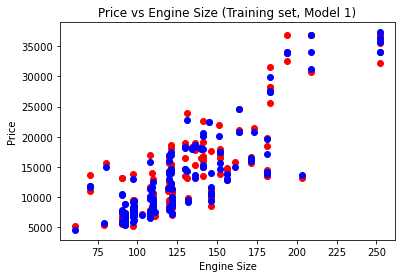

In [65]:
# Visualising the Training set results
plt.scatter(X_train[:, 10], y_train, color='red')
plt.plot(X_train[:, 10], y_modeled1, 'bo')
plt.title('Price vs Engine Size (Training set, Model 1)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

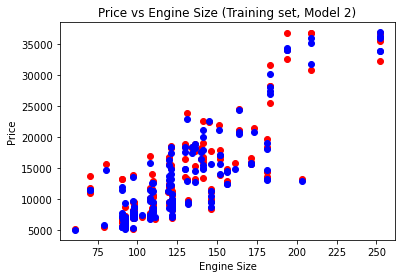

In [66]:
# Visualising the Training set results
plt.scatter(X_train[:, 10], y_train, color='red')
plt.plot(X_train[:, 10], y_modeled2, 'bo')
plt.title('Price vs Engine Size (Training set, Model 2)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

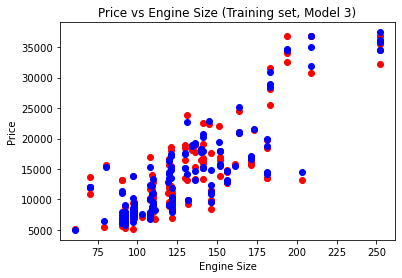

In [67]:
# Visualising the Training set results
plt.scatter(X_train[:, 10], y_train, color='red')
plt.plot(X_train[:, 10], y_modeled3, 'bo')
plt.title('Price vs Engine Size (Training set, Model 3)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

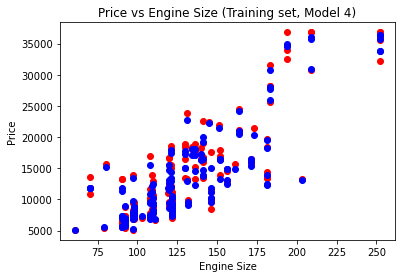

In [68]:
# Visualising the Training set results
plt.scatter(X_train[:, 10], y_train, color='red')
plt.plot(X_train[:, 10], y_modeled4, 'bo')
plt.title('Price vs Engine Size (Training set, Model 4)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

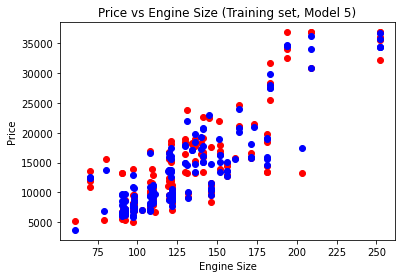

In [69]:
# Visualising the Training set results
plt.scatter(X_train[:, 10], y_train, color='red')
plt.plot(X_train[:, 10], y_modeled5, 'bo')
plt.title('Price vs Engine Size (Training set, Model 5)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

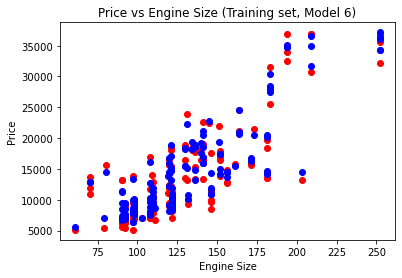

In [70]:
# Visualising the Training set results
plt.scatter(X_train[:, 10], y_train, color='red')
plt.plot(X_train[:, 10], y_modeled6, 'bo')
plt.title('Price vs Engine Size (Training set, Model 6)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

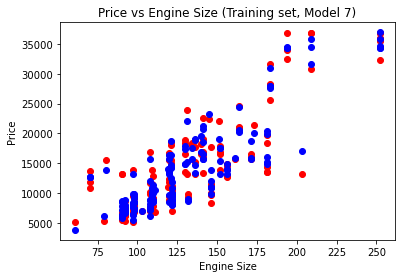

In [71]:
# Visualising the Training set results
plt.scatter(X_train[:, 10], y_train, color='red')
plt.plot(X_train[:, 10], y_modeled7, 'bo')
plt.title('Price vs Engine Size (Training set, Model 7)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

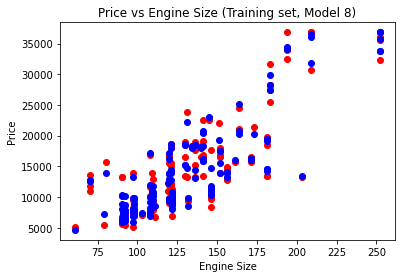

In [72]:
# Visualising the Training set results
plt.scatter(X_train[:, 10], y_train, color='red')
plt.plot(X_train[:, 10], y_modeled8, 'bo')
plt.title('Price vs Engine Size (Training set, Model 8)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

In [73]:
'''
    Далі було графічно відображено залежність реальних і прогнозних даних моделей нейронних мереж від аргументу engine-size
для тестової вибірки для можливості графічного порівняння прогнозних якостей усіх розглянутих моделей.
'''

'\n    Далі було графічно відображено залежність реальних і прогнозних даних моделей нейронних мереж від аргументу engine-size\nдля тестової вибірки для можливості графічного порівняння прогнозних якостей усіх розглянутих моделей.\n'

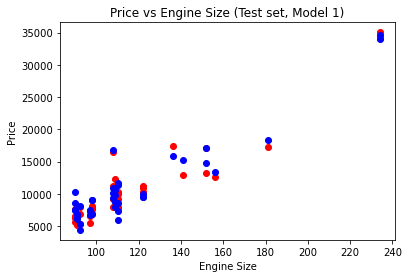

In [74]:
# Visualising the Test set results
plt.scatter(X_test[:, 10], y_test, color='red')
plt.plot(X_test[:, 10], y_pred1, 'bo')
plt.title('Price vs Engine Size (Test set, Model 1)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

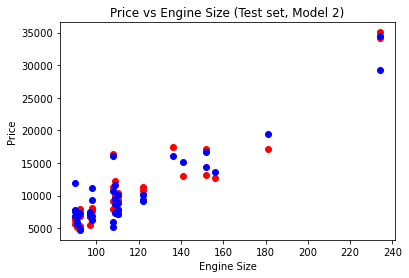

In [75]:
# Visualising the Test set results
plt.scatter(X_test[:, 10], y_test, color='red')
plt.plot(X_test[:, 10], y_pred2, 'bo')
plt.title('Price vs Engine Size (Test set, Model 2)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

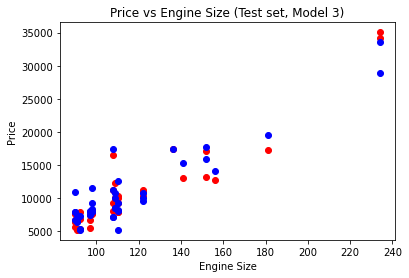

In [76]:
# Visualising the Test set results
plt.scatter(X_test[:, 10], y_test, color='red')
plt.plot(X_test[:, 10], y_pred3, 'bo')
plt.title('Price vs Engine Size (Test set, Model 3)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

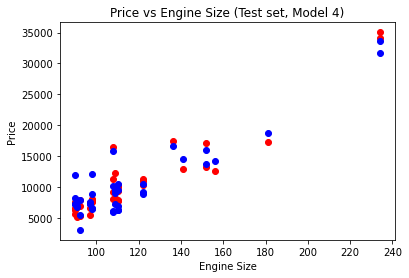

In [77]:
# Visualising the Test set results
plt.scatter(X_test[:, 10], y_test, color='red')
plt.plot(X_test[:, 10], y_pred4, 'bo')
plt.title('Price vs Engine Size (Test set, Model 4)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

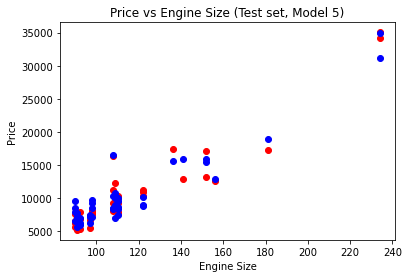

In [78]:
# Visualising the Test set results
plt.scatter(X_test[:, 10], y_test, color='red')
plt.plot(X_test[:, 10], y_pred5, 'bo')
plt.title('Price vs Engine Size (Test set, Model 5)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

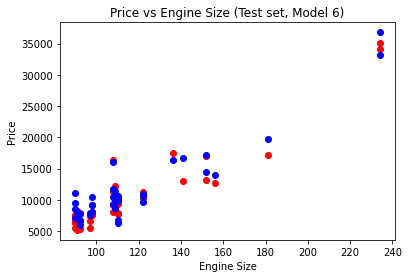

In [79]:
# Visualising the Test set results
plt.scatter(X_test[:, 10], y_test, color='red')
plt.plot(X_test[:, 10], y_pred6, 'bo')
plt.title('Price vs Engine Size (Test set, Model 6)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

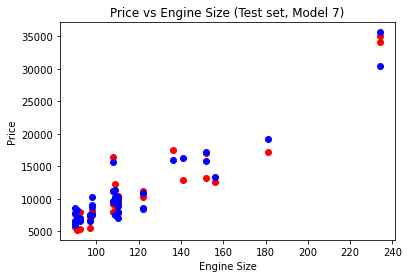

In [80]:
# Visualising the Test set results
plt.scatter(X_test[:, 10], y_test, color='red')
plt.plot(X_test[:, 10], y_pred7, 'bo')
plt.title('Price vs Engine Size (Test set, Model 7)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

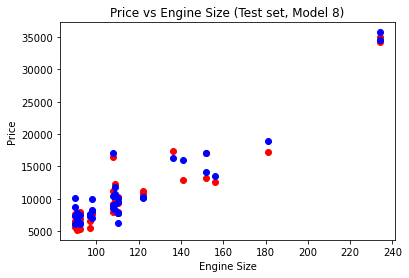

In [81]:
# Visualising the Test set results
plt.scatter(X_test[:, 10], y_test, color='red')
plt.plot(X_test[:, 10], y_pred8, 'bo')
plt.title('Price vs Engine Size (Test set, Model 8)')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

In [82]:
'''
    Для визначення найкращої з розглядуваних моделей порівняємо метрики якості між ними, а також з моделями з попередніх
лабораторних робіт. Для цього імпортуємо датасет з метриками якості моделей з попередніх робіт й доповнимо його метриками
з цієї роботи.
'''

'\n    Для визначення найкращої з розглядуваних моделей порівняємо метрики якості між ними, а також з моделями з попередніх\nлабораторних робіт. Для цього імпортуємо датасет з метриками якості моделей з попередніх робіт й доповнимо його метриками\nз цієї роботи.\n'

In [83]:
metrics_df=pd.read_csv('Metrics_after_LR3 (Tomilovych, EC-61).csv', sep=';')
for to_append in [rnn1_metrics, rnn2_metrics, rnn3_metrics, rnn4_metrics, rnn5_metrics, rnn6_metrics, rnn7_metrics, rnn8_metrics]:
    a_series=pd.Series(to_append, index=metrics_df.columns)
    metrics_df=metrics_df.append(a_series, ignore_index=True)
metrics_df.iloc[8:]

,model,train_r2,test_r2,train_mse,test_mse
8,45-45-1-rnn,NaN,NaN,1.128897e+06,2.620153e+06
9,45-45-45-1-rnn,NaN,NaN,7.217031e+05,4.157993e+06
10,45-60-1-rnn,NaN,NaN,1.080991e+06,3.940980e+06
11,45-60-60-1-rnn,NaN,NaN,8.049473e+05,4.429749e+06
12,27-27-1-rnn,NaN,NaN,1.975469e+06,2.460375e+06
13,27-27-27-1-rnn,NaN,NaN,1.548358e+06,3.305243e+06
14,27-36-1-rnn,NaN,NaN,2.133710e+06,2.803106e+06
15,27-36-36-1-rnn,NaN,NaN,1.240233e+06,2.366501e+06


In [88]:
'''
    З таблиці можна побачити, що найменше значення метрики MSE для навчальної вибірки має нейронна мережа з архітектурою
45-45-45-1, але вона тільки сьома з 8 розглядуваних моделей за значенням MSE для тестової вибірки. Разом з тим, це значення
все одно є непоганим.
    Найкраще значення значення метрики MSE для навчальної вибірки має нейронна мережа з архітектурою 27-36-36-1. Її навчальна
метрика MSE є п'ята з 8, але все одно досить низька. Разом з тим, така модель навчена тільки на 27 значущих незалежних
змінних і має простішу архітектуру, ніж найкраща модель за значенням MSE у навчальній вибірці.
    Загалом не можна стверджувати яка з розглянутих нейронних мереж є кращою, але для вирішення саме задач прогнозування ціни
автомобіля варто вибирати нейронну мережу 27-36-36-1.
    Тепер порівняємо роботи з цієї лабораторної роботи з моделями з попередніх робіт
'''

"\n    З таблиці можна побачити, що найменше значення метрики MSE для навчальної вибірки має нейронна мережа з архітектурою\n45-45-45-1, але вона тільки сьома з 8 розглядуваних моделей за значенням MSE для тестової вибірки. Разом з тим, це значення\nвсе одно є непоганим.\n    Найкраще значення значення метрики MSE для навчальної вибірки має нейронна мережа з архітектурою 27-36-36-1. Її навчальна\nметрика MSE є п'ята з 8, але все одно досить низька. Разом з тим, така модель навчена тільки на 27 значущих незалежних\nзмінних і має простішу архітектуру, ніж найкраща модель за значенням MSE у навчальній вибірці.\n    Загалом не можна стверджувати яка з розглянутих нейронних мереж є кращою, але для вирішення саме задач прогнозування ціни\nавтомобіля варто вибирати нейронну мережу 27-36-36-1.\n    Тепер порівняємо роботи з цієї лабораторної роботи з моделями з попередніх робіт\n"

In [85]:
metrics_df

,model,train_r2,test_r2,train_mse,test_mse
0,sr,0.712345,0.859868,1.719428e+07,5.580358e+06
1,mr,0.943201,0.875247,3.395103e+06,4.967967e+06
2,pr,0.724615,0.870935,1.646086e+07,5.139649e+06
3,omr,0.933351,0.914482,3.983876e+06,3.405523e+06
4,sdt,0.866935,0.877774,7.916376e+06,4.867335e+06
5,dt,0.928467,0.882820,4.255657e+06,4.666362e+06
6,rf,0.971976,0.908452,1.667228e+06,3.645657e+06
7,odt,0.928212,0.886986,4.270847e+06,4.500473e+06
8,45-45-1-rnn,NaN,NaN,1.128897e+06,2.620153e+06
9,45-45-45-1-rnn,NaN,NaN,7.217031e+05,4.157993e+06


In [89]:
'''
    З цієї таблиці можна побачити, що нейронні мережі у більшості мають меншу помилку MSE і для навчальної, і для тестової
вибірки, ніж моделі з попередніх робіт. Це показує їхні кращі апроксимаційні та прогнозні якості, а отже серед усіх
розглядуваних моделей найкращими є нейронні мережі, а серед них найкращоб для прогнозування ціни автомобілів є нейронна
мережа з архітектурою 27-36-36-1.
    Метрики якості моделей з цієї лабораторної роботи доповнили датасет метрик якості з попередніх робіт та будуть
експортовані для можливості подальшого порівняння з інишими типами моделей.
'''

'\n    З цієї таблиці можна побачити, що нейронні мережі у більшості мають меншу помилку MSE і для навчальної, і для тестової\nвибірки, ніж моделі з попередніх робіт. Це показує їхні кращі апроксимаційні та прогнозні якості, а отже серед усіх\nрозглядуваних моделей найкращими є нейронні мережі, а серед них найкращоб для прогнозування ціни автомобілів є нейронна\nмережа з архітектурою 27-36-36-1.\n    Метрики якості моделей з цієї лабораторної роботи доповнили датасет метрик якості з попередніх робіт та будуть\nекспортовані для можливості подальшого порівняння з інишими типами моделей.\n'

In [87]:
# Exporting dataset with metrics
metrics_df.to_csv('Metrics_after_LR4 (Tomilovych, EC-61).csv', sep=';', index=False)